# 회귀 - 캘리포니아 집값

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [4]:
df = pd.DataFrame(house.data, columns=house.feature_names)
df['target'] = house.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.shape

(20640, 9)

- Train/Test dataset 분리

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    house.data, house.target, test_size=0.1, random_state=2022
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18576, 8), (2064, 8), (18576,), (2064,))

* 모델 정의/설정/학습

In [7]:
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential([
                    Dense(20, input_dim = 8, activation = 'relu'),
                    Dense(8, activation = 'relu'),
                    Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 8)                 168       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [12]:
hist = model.fit(X_train, y_train, validation_split=0.2, epochs = 100,
                 batch_size = 128)

Epoch 1/100
117/117 [==============================] - 1s 3ms/step - loss: 924.8505 - val_loss: 11.1883
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 13.7025 - val_loss: 9.9141
Epoch 3/100
117/117 [==============================] - 0s 2ms/step - loss: 12.0063 - val_loss: 8.7134
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 10.4420 - val_loss: 7.8351
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 8.9745 - val_loss: 6.4690
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 7.3797 - val_loss: 5.3087
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 6.1005 - val_loss: 4.3859
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 4.9349 - val_loss: 3.6842
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 3.8383 - val_loss: 2.0832
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - loss: 1.1136 - 

* 학습과정 시각화

In [23]:
y_loss = hist.history['loss'][5:]
y_vloss = hist.history['val_loss'][5:]
xs = np.arange(6, len(y_loss)+6)

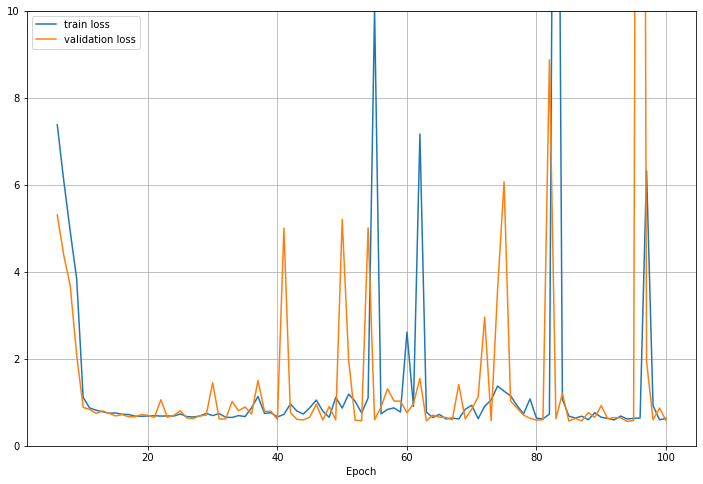

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
plt.plot(xs, y_loss, label = 'train loss')
plt.plot(xs, y_vloss, label = 'validation loss')
plt.ylim([0, 10])
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

Case 2) 모델 재정의, 콜백 함수 사용

In [29]:
model2 = Sequential([
                     Dense(10, input_dim = 8, activation='relu'),
                     Dense(16, activation = 'relu'),
                     Dense(6, activation = 'relu'),
                     Dense(1)
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                90        
                                                                 
 dense_8 (Dense)             (None, 16)                176       
                                                                 
 dense_9 (Dense)             (None, 6)                 102       
                                                                 
 dense_10 (Dense)            (None, 1)                 7         
                                                                 
Total params: 375
Trainable params: 375
Non-trainable params: 0
_________________________________________________________________


In [30]:
model2.compile(optimizer='rmsprop', loss = 'mean_squared_error')

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_path = 'california_house2.h5'
checkpoint = ModelCheckpoint(
    model_path, monitor='val_loss', verbose=1, save_best_only=True
)
early_stop = EarlyStopping(patience = 30)

In [32]:
hist2 = model2.fit(X_train, y_train, validation_split=0.2, epochs = 1000, 
                   batch_size = 128, verbose = 0, callbacks = [checkpoint, early_stop])


Epoch 00001: val_loss improved from inf to 4.69632, saving model to california_house2.h5

Epoch 00002: val_loss did not improve from 4.69632

Epoch 00003: val_loss did not improve from 4.69632

Epoch 00004: val_loss improved from 4.69632 to 1.76989, saving model to california_house2.h5

Epoch 00005: val_loss did not improve from 1.76989

Epoch 00006: val_loss improved from 1.76989 to 1.61931, saving model to california_house2.h5

Epoch 00007: val_loss did not improve from 1.61931

Epoch 00008: val_loss did not improve from 1.61931

Epoch 00009: val_loss did not improve from 1.61931

Epoch 00010: val_loss improved from 1.61931 to 1.14543, saving model to california_house2.h5

Epoch 00011: val_loss did not improve from 1.14543

Epoch 00012: val_loss did not improve from 1.14543

Epoch 00013: val_loss did not improve from 1.14543

Epoch 00014: val_loss did not improve from 1.14543

Epoch 00015: val_loss did not improve from 1.14543

Epoch 00016: val_loss did not improve from 1.14543

Epo

In [35]:
y_loss = hist2.history['loss']
y_vloss = hist2.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

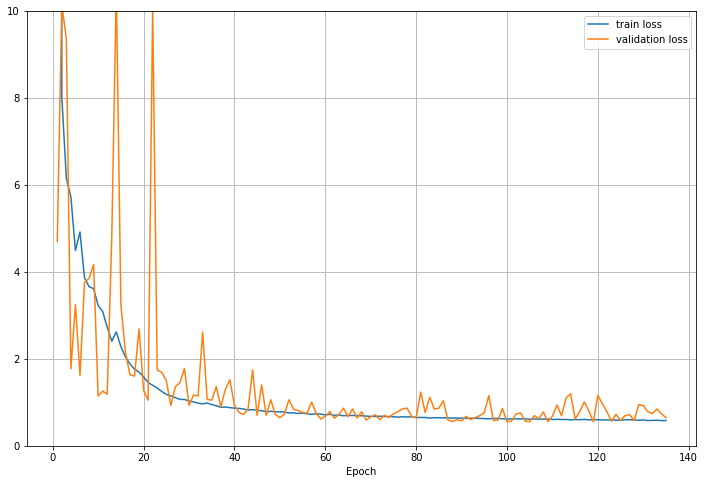

In [36]:
plt.figure(figsize = (12, 8))
plt.plot(xs, y_loss, label = 'train loss')
plt.plot(xs, y_vloss, label = 'validation loss')
plt.ylim([0, 10])
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

* 평가

In [37]:
pred = model.predict(X_test)
pred2 = model2.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, pred), r2_score(y_test, pred)

(0.6342579010419714, 0.5058067014515283)

In [41]:
mean_squared_error(y_test, pred2), r2_score(y_test, pred2)

(0.6467749999320324, 0.4960537817345262)

In [42]:
df = pd.DataFrame({
    'y_test' : y_test, 'pred' : pred.flatten(), 'pred2' : pred2.flatten()
})
df.head(10)

,y_test,pred,pred2
0,4.771,4.560508,4.885724
1,1.371,1.668998,1.014192
2,1.233,2.010825,2.663762
3,0.938,1.756583,1.268851
4,3.260,3.173606,2.994500
5,1.516,1.897010,1.058061
6,2.738,2.476142,2.015067
7,1.368,2.034904,1.881567
8,1.175,1.158225,0.887134
9,2.966,2.886039,2.579246
